In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams['axes.unicode_minus'] = False

print('설정되어있는 폰트 글꼴: {}'.format(plt.rcParams['font.family']))

설정되어있는 폰트 글꼴: ['NanumGothic']


In [2]:
df = pd.read_csv("C:/Users/OWNER/Desktop/빅데이터 프로젝트/데이터 정제/이상치 결측치/새 폴더/on_total_ver2.csv", encoding='cp949')
df

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,OrderDate,OrderYear,OrderYearMonth,OrderMonth,...,PriceMax,time,DeliveryDate,DeliveryYear,DeliveryMonth,DeliveryDay,DeliveryHour,DeliveryMinute,DeliverySecond,DeliveryDow
0,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2210012,2510,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2650,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
1,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2340032,2870,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,2900,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
2,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2320050,3350,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,3760,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
3,U10001,U10001-O2020-1001,2020-03-13 23:29:23,P2230012,9680,2020-03-16 04:50:00,2020-03-13,2020,2020-03,3,...,9770,04:50:00,2020-03-16,2020,3,13,4,29,23,월요일
4,U10001,U10001-O2020-1002,2020-07-23 22:35:08,P2250010,1240,2020-07-25 04:54:00,2020-07-23,2020,2020-07,7,...,1330,04:54:00,2020-07-25,2020,7,23,4,35,8,토요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872042,U13000,U13000-O2022-1022,2022-12-04 18:14:16,P1420050,11500,2022-12-05 04:11:00,2022-12-04,2022,2022-12,12,...,12320,04:11:00,2022-12-05,2022,12,4,4,14,16,월요일
872043,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1410042,7050,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,7230,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872044,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1130024,4190,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,4460,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일
872045,U13000,U13000-O2022-1023,2022-03-01 02:54:31,P1620039,12230,2022-03-02 04:53:00,2022-03-01,2022,2022-03,3,...,13020,04:53:00,2022-03-02,2022,3,1,4,54,31,수요일


In [3]:
year_user = df.groupby(['idUser','OrderYear']).Price.sum().reset_index()
year_user.head()

,idUser,OrderYear,Price
0,U10001,2020,332960
1,U10001,2021,742810
2,U10001,2022,657330
3,U10002,2020,315570
4,U10002,2021,702770


In [4]:
user_pivot = year_user.pivot(index='idUser', columns='OrderYear', values='Price')
user_pivot

OrderYear,2020,2021,2022
idUser,,,
U10001,332960.0,742810.0,657330.0
U10002,315570.0,702770.0,1176470.0
U10003,467320.0,448040.0,1424110.0
U10004,393790.0,927520.0,1149670.0
U10005,NaN,846140.0,1247880.0
...,...,...,...
U12996,290470.0,837670.0,1089890.0
U12997,485100.0,950010.0,945560.0
U12998,437340.0,958720.0,1294960.0


In [5]:
### 결측치 다 0으로 바꿈 왜냐하면 해당 년도 구매 x
user_pivot.fillna(0, inplace=True)
user_pivot.reset_index(inplace=True)
# user_pivot.reset_index(inplace=True,drop=True)
user_pivot

OrderYear,idUser,2020,2021,2022
0,U10001,332960.0,742810.0,657330.0
1,U10002,315570.0,702770.0,1176470.0
2,U10003,467320.0,448040.0,1424110.0
3,U10004,393790.0,927520.0,1149670.0
4,U10005,0.0,846140.0,1247880.0
...,...,...,...,...
2995,U12996,290470.0,837670.0,1089890.0
2996,U12997,485100.0,950010.0,945560.0
2997,U12998,437340.0,958720.0,1294960.0
2998,U12999,415650.0,928350.0,1523210.0


In [6]:
user_pivot['가입년도'] = 2020
for i in range(len(user_pivot)):
    if user_pivot.loc[i,2020] == 0:
        if user_pivot.loc[i,2021] == 0:
            user_pivot.loc[i,'가입년도'] = 2022
        else:
            user_pivot.loc[i,'가입년도'] = 2021
user_pivot

OrderYear,idUser,2020,2021,2022,가입년도
0,U10001,332960.0,742810.0,657330.0,2020
1,U10002,315570.0,702770.0,1176470.0,2020
2,U10003,467320.0,448040.0,1424110.0,2020
3,U10004,393790.0,927520.0,1149670.0,2020
4,U10005,0.0,846140.0,1247880.0,2021
...,...,...,...,...,...
2995,U12996,290470.0,837670.0,1089890.0,2020
2996,U12997,485100.0,950010.0,945560.0,2020
2997,U12998,437340.0,958720.0,1294960.0,2020
2998,U12999,415650.0,928350.0,1523210.0,2020


In [7]:
lst = []
for ycol in [2020,2021,2022]:
    dic = {}
    dic['년도'] = ycol
    dic['전체매출'] = int(user_pivot[ycol].sum())
    dic['기존고객 매출'] = int(user_pivot[user_pivot['가입년도'] != ycol][ycol].sum())
    dic['신규고객 매출'] = int(user_pivot[user_pivot['가입년도'] == ycol][ycol].sum())
    lst.append(dic)

ldf = pd.DataFrame(lst)
ldf['기존고객 매출 비율'] = ldf['기존고객 매출'] / ldf['전체매출']
ldf['신규고객 매출 비율'] = ldf['신규고객 매출'] / ldf['전체매출']
ldf

,년도,전체매출,기존고객 매출,신규고객 매출,기존고객 매출 비율,신규고객 매출 비율
0,2020,1000518450,0,1000518450,0.000000,1.000000
1,2021,2495177160,2118807560,376369600,0.849161,0.150839
2,2022,3239693430,3213242160,26451270,0.991835,0.008165


In [8]:
year_usercnt = []
for ycol in [2020,2021,2022]:
    dic = {}
    dic['년도'] = ycol
    dic['신규 고객 수'] = len(user_pivot[user_pivot.가입년도 == ycol])
    year_usercnt.append(dic)
year_usercnt = pd.DataFrame(year_usercnt)
year_usercnt

,년도,신규 고객 수
0,2020,2550
1,2021,428
2,2022,22


In [12]:
### 고객 특성 데이터 가져오기
df_user = pd.read_csv("C:/Users/OWNER/Desktop/빅데이터 프로젝트/데이터 정제/이상치 결측치/고객데이터 파생변수/on_user_final.csv", encoding='cp949')

### 21년도 신규 고객 특성 파악

In [14]:
newlst_21 = user_pivot[user_pivot.가입년도 == 2021].idUser.values.tolist()
new_21 = df_user[df_user.idUser.isin(newlst_21)]
new_21

,idUser,Gender,Age,FamilyCount,MemberYN,Monetary,UserClass,AgeGroup
4,U10005,여성,23,2,Y,2104870,이탈 고객,20대
5,U10006,남성,25,1,Y,1845100,신규 고객,20대
7,U10008,여성,33,3,Y,2253030,신규 고객,30대
15,U10016,남성,33,3,Y,1826740,이탈 고객,30대
17,U10018,여성,21,1,Y,2107900,이탈 고객,20대
...,...,...,...,...,...,...,...,...
2956,U12957,여성,27,1,Y,1608200,이탈 고객,20대
2962,U12963,여성,29,3,Y,2723480,겨울잠 고객,20대
2967,U12968,남성,31,0,Y,1737570,이탈 고객,30대
2975,U12976,남성,34,2,Y,1605960,신규 고객,30대


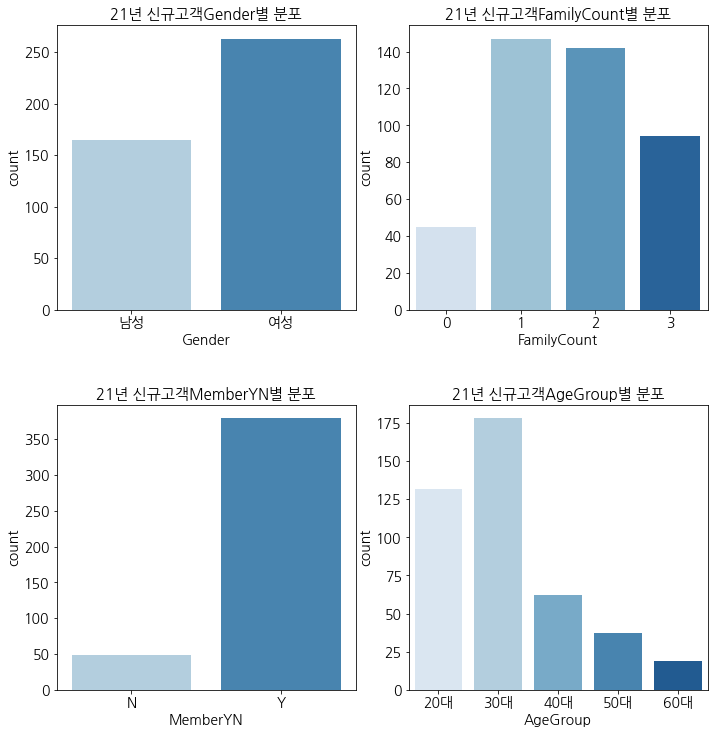

In [21]:
### 월, 요일, 시 별 주문량 그래프
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in ['Gender', 'FamilyCount','MemberYN','AgeGroup']:
    plt.subplot(2, 2, i) 
    sns.countplot(data=new_21.sort_values(by=col), x=col, palette='Blues')
    plt.title("21년 신규고객" + col + "별 분포", fontsize=15)
    i += 1

### 22년도 신규고객 파악

In [18]:
newlst_22 = user_pivot[user_pivot.가입년도 == 2022].idUser.values.tolist()
new_22 = df_user[df_user.idUser.isin(newlst_22)]
new_22.head()

,idUser,Gender,Age,FamilyCount,MemberYN,Monetary,UserClass,AgeGroup
48,U10049,남성,26,2,Y,930690,신규 고객,20대
87,U10088,여성,20,1,Y,1042230,이탈 고객,20대
152,U10153,여성,33,0,N,1418960,신규 고객,30대
416,U10417,남성,40,2,Y,1295270,신규 고객,40대
456,U10457,여성,30,0,Y,1318560,이탈 고객,30대


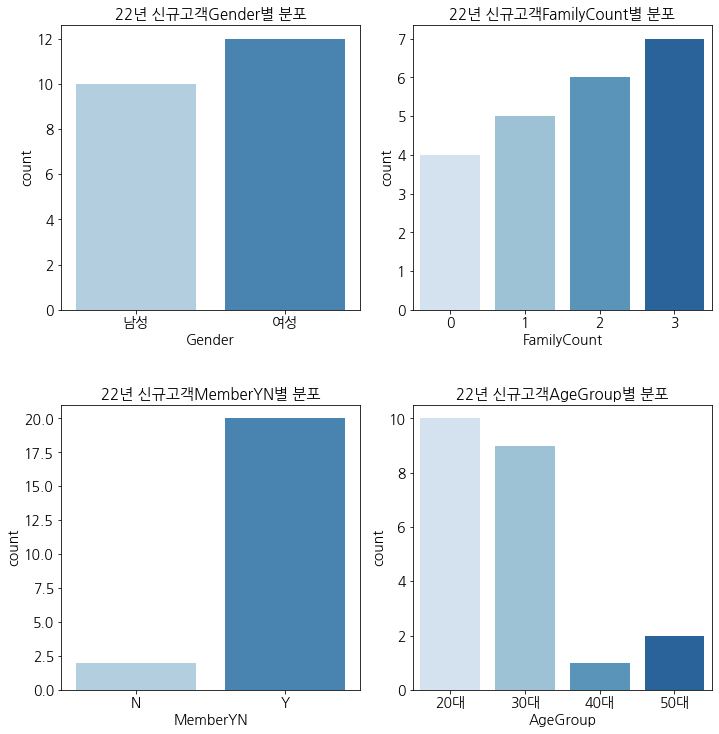

In [22]:
### 월, 요일, 시 별 주문량 그래프
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.tight_layout(w_pad=1, h_pad=5)
i = 1
for col in ['Gender', 'FamilyCount','MemberYN','AgeGroup']:
    plt.subplot(2, 2, i) 
    sns.countplot(data=new_22.sort_values(by=col), x=col, palette='Blues')
    plt.title("22년 신규고객" + col + "별 분포", fontsize=15)
    i += 1

30의 여성의 경우, 가족 구성원이 1 이상일 때 구매력이 높아진다?

In [23]:
user_pivot

OrderYear,idUser,2020,2021,2022,가입년도
0,U10001,332960.0,742810.0,657330.0,2020
1,U10002,315570.0,702770.0,1176470.0,2020
2,U10003,467320.0,448040.0,1424110.0,2020
3,U10004,393790.0,927520.0,1149670.0,2020
4,U10005,0.0,846140.0,1247880.0,2021
...,...,...,...,...,...
2995,U12996,290470.0,837670.0,1089890.0,2020
2996,U12997,485100.0,950010.0,945560.0,2020
2997,U12998,437340.0,958720.0,1294960.0,2020
2998,U12999,415650.0,928350.0,1523210.0,2020
